In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.cm import ScalarMappable
import numpy as np
import pickle



In /Users/utsavbaghela/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/utsavbaghela/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/utsavbaghela/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/utsavbaghela/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/utsavb

In [2]:
data = pd.read_csv('BC_dataset.csv',header=None)
data.columns = ['source', 'target', 'rating', 'timestamp']


In [4]:
data

,source,target,rating,timestamp
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09
...,...,...,...,...
35587,4499,1810,1,1.453612e+09
35588,2731,3901,5,1.453679e+09
35589,2731,4897,5,1.453679e+09
35590,13,1128,1,1.453680e+09


### Page Rank for each Node

In [5]:
Di_graph = nx.DiGraph()


In [6]:
for i in range(0,data.shape[0]):
    Di_graph.add_edge(data.iat[i,0],data.iat[i,1])

In [7]:
pagerank = nx.pagerank(Di_graph)
nodes=list(pagerank.keys())
rank_score=list(pagerank.values())

# print("Page Rank Score: ")
# print("Nodes: ", nodes)
# print("Page Rank Scores: ", rank_score)



In [8]:
pagerank_df = pd.DataFrame(columns=['Node','PageRank'])
pagerank_df['Node']=  nodes
pagerank_df['PageRank'] = rank_score

In [9]:
pagerank_df

,Node,PageRank
0,6,0.000774
1,2,0.000977
2,5,0.000093
3,1,0.005029
4,15,0.000323
...,...,...
5876,6000,0.000035
5877,6002,0.000065
5878,6003,0.000047
5879,6004,0.000052


### Authority & Hub Scores (For Each Node)

In [10]:
hubs, authorities = nx.hits(Di_graph)
nodes=list(hubs.keys())
Authority_Scores = list(authorities.values())
hub_scores=list(hubs.values())

In [11]:
hubs_df = pd.DataFrame(columns=['Node','Authority Scores','Hub scores'])
hubs_df['Node']=  nodes
hubs_df['Authority Scores'] = Authority_Scores
hubs_df['Hub scores'] = hub_scores

In [12]:
hubs_df=hubs_df.sort_values('Node')

In [13]:
hubs_df

,Node,Authority Scores,Hub scores
3,1,4.496190e-03,4.636831e-03
1,2,5.890168e-04,7.758275e-04
6,3,5.475613e-04,-0.000000e+00
5,4,1.119703e-03,1.507356e-03
2,5,1.697030e-04,2.087995e-04
...,...,...,...
5876,6000,-0.000000e+00,-8.402699e-23
5877,6002,-3.493769e-21,-0.000000e+00
5878,6003,2.131752e-06,-0.000000e+00
5879,6004,1.130527e-04,-0.000000e+00


In [14]:
hubs_df['Page Rank']=pagerank_df['PageRank']
pd.set_option('display.max_columns', None)  

In [19]:
hubs_df

,Node,Authority Scores,Hub scores,Page Rank
3,1,4.496190e-03,4.636831e-03,0.005029
1,2,5.890168e-04,7.758275e-04,0.000977
6,3,5.475613e-04,-0.000000e+00,0.000383
5,4,1.119703e-03,1.507356e-03,0.001290
2,5,1.697030e-04,2.087995e-04,0.000093
...,...,...,...,...
5876,6000,-0.000000e+00,-8.402699e-23,0.000035
5877,6002,-3.493769e-21,-0.000000e+00,0.000065
5878,6003,2.131752e-06,-0.000000e+00,0.000047
5879,6004,1.130527e-04,-0.000000e+00,0.000052


### Graphical representation of scores (PageRank, Hub Score, Authority score)

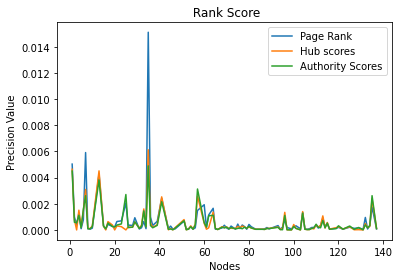

In [24]:
# f = plt.figure()
# f.set_figwidth(30)
# f.set_figheight(10)

# colors = ['#E69F00', '#56B4E9', '#F0E442']
# names = ['Page Rank', 'Hubs Value', 'Authority Scores']

# plt.hist([hubs_df['Page Rank'][:1000], hubs_df['Hub scores'][:1000], hubs_df['Authority Scores'][:1000]], bins = int(180/15),
#          color = colors, label=names)

plt.plot(hubs_df['Node'][:100],hubs_df['Page Rank'][:100],label = "Page Rank")
plt.plot(hubs_df['Node'][:100],hubs_df['Hub scores'][:100],label = "Hub scores")
plt.plot(hubs_df['Node'][:100],hubs_df['Authority Scores'][:100],label = "Authority Scores")

plt.legend()

plt.xlabel("Nodes")

plt.title(" Rank Score")
plt.ylabel("Precision Value")
plt.show()

# plt.legend()
# plt.xlabel('Value')
# plt.ylabel('Nodes')
# plt.title('Side-by-Side Histogram')

